In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("전처리저장용.csv")
import matplotlib as mpl
mpl.rcParams['font.family'] ='AppleGothic'


In [3]:
df_ca=df[df["카테고리"]=="마케팅"]

In [4]:
# count = df_ca[df_ca['코스(상품) 이름'].str.contains('김영하')].shape[0]
# print(count)


In [5]:
# 월별로 '코스(상품) 이름'의 빈도수 계산하여 파일로 저장
for month in range(1, 13):
    # 해당 월에 해당하는 데이터 선택
    df_month = df_ca[df_ca['월'] == month]
    
    # '코스(상품) 이름'의 빈도수 계산
    course_counts = df_month['코스(상품) 이름'].value_counts()
    
    # 데이터프레임으로 변환
    df_course_counts = pd.DataFrame({'코스(상품) 이름': course_counts.index, '빈도수': course_counts.values})
    
    # 월별 파일로 저장
    file_name = f'./noRED/월별_코스별_빈도수_{month}월.csv'
    df_course_counts.to_csv(file_name, index=False)


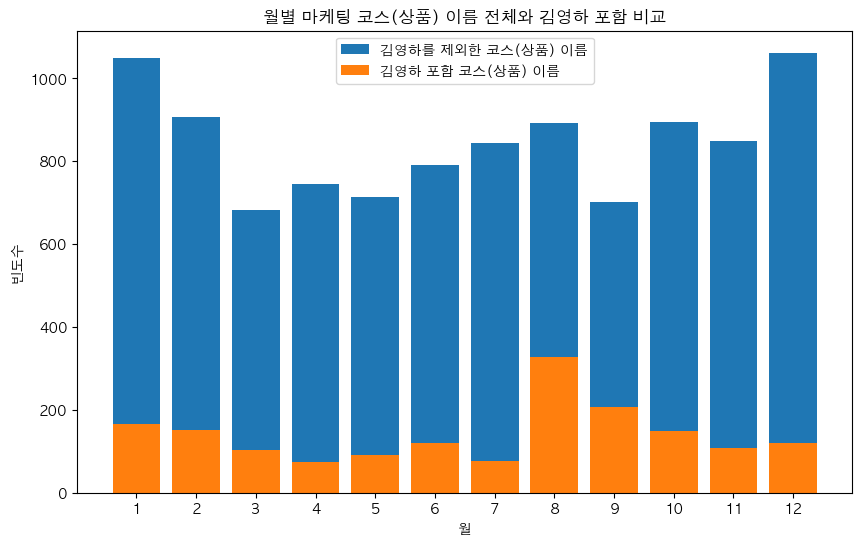

In [6]:
import matplotlib.pyplot as plt

# '마케팅' 카테고리에서 월별로 '코스(상품) 이름' 카운트
month_counts = []
for month in range(1, 13):
    # 해당 월에 해당하는 데이터 선택
    df_month = df_ca[df_ca['월'] == month]
    
    # '코스(상품) 이름' 카운트
    count = df_month.shape[0]
    month_counts.append(count)

# '김영하'가 포함된 '코스(상품) 이름' 카운트
kim_counts = []
for month in range(1, 13):
    # 해당 월에 해당하는 데이터 선택
    df_month = df_ca[df_ca['월'] == month]
    
    # '김영하'가 포함된 '코스(상품) 이름' 카운트
    kim_count = df_month[df_month['코스(상품) 이름'].str.contains('김영하')].shape[0]
    kim_counts.append(kim_count)

# 김영하를 제외한 마케팅 코스(상품) 이름의 빈도수
other_counts = [month_count - kim_count for month_count, kim_count in zip(month_counts, kim_counts)]

# 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(1, 13), other_counts, label='김영하를 제외한 코스(상품) 이름')
plt.bar(range(1, 13), kim_counts, label='김영하 포함 코스(상품) 이름')
plt.xticks(range(1, 13))
plt.xlabel('월')
plt.ylabel('빈도수')
plt.title('월별 마케팅 코스(상품) 이름 전체와 김영하 포함 비교')
plt.legend()
plt.show()
#1월 1135

In [7]:
# '마케팅' 카테고리에서 월별로 코스(상품) 이름의 유니크값의 갯수 출력
for month in range(1, 13):
    # 해당 월에 해당하는 데이터 선택
    df_month = df_ca[df_ca['월'] == month]
    
    # 코스(상품) 이름의 유니크값의 갯수 출력
    unique_count = df_month['코스(상품) 이름'].nunique()
    print(f"{month}월: {unique_count}")


1월: 19
2월: 21
3월: 19
4월: 21
5월: 21
6월: 19
7월: 18
8월: 21
9월: 22
10월: 24
11월: 26
12월: 27


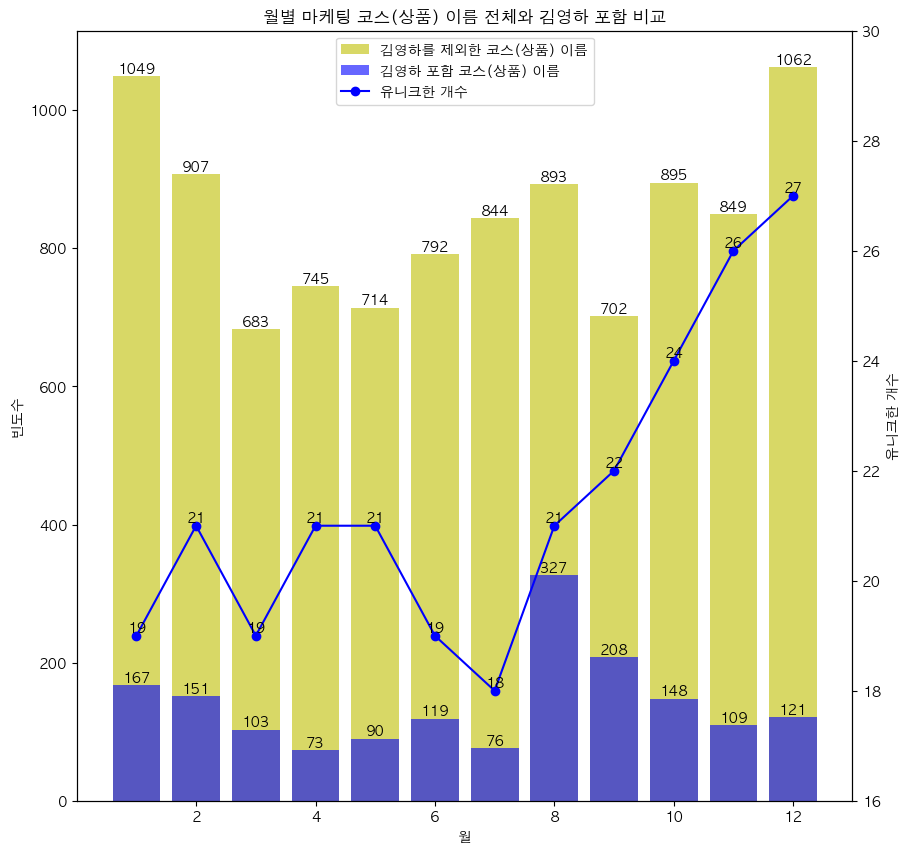

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 설정
months = np.arange(1, 13)
unique_counts = []

fig, ax1 = plt.subplots(figsize=(10, 10))


for month in months:
    # 해당 월에 해당하는 데이터 선택
    df_month = df_ca[df_ca['월'] == month]
    
    # 코스(상품) 이름의 유니크값의 갯수 출력
    unique_count = df_month['코스(상품) 이름'].nunique()
    unique_counts.append(unique_count)


# 김영하가 포함된 코스와 김영하를 제외한 코스의 판매 빈도를 막대 그래프로 표시
ax1.bar(months, other_counts, color='y', label='김영하를 제외한 코스(상품) 이름', alpha=0.6)
ax1.bar(months, kim_counts, color='b', label='김영하 포함 코스(상품) 이름', alpha=0.6)

# 카운트 값 텍스트로 표시
for i, count in enumerate(other_counts):
    ax1.text(months[i], count, str(count), ha='center', va='bottom')
for i, count in enumerate(kim_counts):
    ax1.text(months[i], count, str(count), ha='center', va='bottom')

# 각 월별 유니크한 코스(상품) 이름 개수를 꺾은선 그래프로 표시
ax2 = ax1.twinx()
ax2.plot(months, unique_counts, color='b', marker='o', label='유니크한 개수')

# 꺾은선 그래프의 값 텍스트로 표시
for i, count in enumerate(unique_counts):
    ax2.text(months[i], count, str(count), ha='center', va='bottom')

# 축과 레이블 설정
ax1.set_xlabel('월')
ax1.set_ylabel('빈도수')
ax2.set_ylabel('유니크한 개수')
ax1.set_title('월별 마케팅 코스(상품) 이름 전체와 김영하 포함 비교')

# 범례 표시
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc=0)
ax2.set_ylim(16, 30)  # 오른쪽 y축 범위 설정

plt.show()
